#**Polynomial Regression Example**


---
Here we will implement the Polynomial Regression using Python. We will understand it by comparing Polynomial Regression model with the Simple Linear Regression model. So first, let's understand the problem for which we are going to build the model.


**Problem Description**: There is a Human Resource company, which is going to hire a new candidate. The candidate has **told his previous salary 160K per annum as regional manager**, and **the HR have to check whether he is telling the truth or bluff.** So to identify this, they only have a dataset of his previous company in which the salaries of the top 10 positions are mentioned with their levels. 

By checking the dataset available, we have found that there is a non-linear relationship between the Position levels and the salaries. **Our goal is to build a Bluffing detector regression model, so HR can hire an honest candidate.** 


Here **we will predict the output for level 6.5 because the candidate has 4+ years' experience** as a regional manager, so **he must be somewhere between levels 7 and 6.**


---




**Importing libraries**

In [29]:
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd

**Importing dataset**

In [30]:
data = pd.read_csv('https://trello-attachments.s3.amazonaws.com/6062c6af283e86843a32b025/60d0152706cf05391bac797c/164d4521d23ff95a2989c5f66e08ff33/Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000




---



#**Extracting Independent Variable & Dependent Variable**

Independent variable = Level

--> because it can stand on its own, meaning it is unaffected by other values

Dependent variable = Salary

--> salary is dependent on level

##**Independent Variable**

In [31]:
x = data.Level.values
x

#This level/dataset is in a 1D array, we need to convert it into a 2D array
# Independent variable has to be in a 2D array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

###**Converting 1D array to 2D for Independent Variable**

In [32]:
x = data.Level.values[:,np.newaxis]
x.shape
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

##**Dependent Variable**

In [33]:
y = data.Salary.values
y.shape

(10,)

##**Our Variables**

In [34]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [35]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])



---



#**Building a Linear Regression Model**

Let's try to solve the problem by building **a regression model first**.

##**Fitting the Linear Regression to the dataset**

-->Applying linear equation to the dataset

**Importing & executing LinearRegression library**

In [36]:
from sklearn.linear_model import LinearRegression
lin_regs = LinearRegression()
lin_regs.fit(x,y)

LinearRegression()

##**Fitting the Polynomial Regression to the dataset**

**Importing Polynomial Regression package**

--> Polynomial Feature will increase the **degree of the independent variable** so that **we can get more accurate predictions**

[Learn more about Polynomial Features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_regs = PolynomialFeatures(degree=2)
x_poly = poly_regs.fit_transform(x)
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

##**Understanding x_poly**

When **degree is set to 2**, features created will be, [1, x1 , x2]

Compare x_poly with x

##**Applying Linear Model**

Since we increased the degree of the x/indpendent variable(x_poly), we will use it in the equation below

In [38]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly,y)

LinearRegression()

###**What will happen if you apply a Simple Linear Regression**?

Here's to visualise the result for Linear Regression Model

mtp.plot(IndependentVariable,PredictedValue)

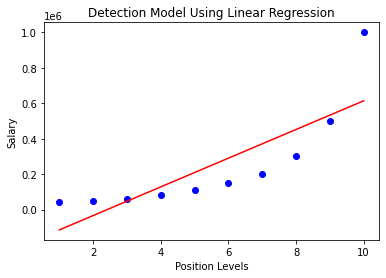

In [39]:
mtp.scatter(x,y,color="blue")
mtp.plot(x,lin_regs.predict(x),color="red")
mtp.title('Detection Model Using Linear Regression')
mtp.xlabel('Position Levels')
mtp.ylabel('Salary')
mtp.show()

In this output image, we can clearly see **the regression line is so far from the dataset**

If you consider this output to **predict the salary of CEO**, it will give an output of **$60K** , 

**which is VERY FAR** from the original value(more than $100K)

Hence, we need a curved model to fit the dataset other than a straight line. 
The model we used just now is not accurate.


---



###**Visualising the result for Polynomial Regression, at degree=2**

See the difference? 

We are now using **lin_reg_2** instead of **lin_regs** in the code

Predictions will be done using the **transformed polynomial data of x** --> poly_regs.fit_transform(x)

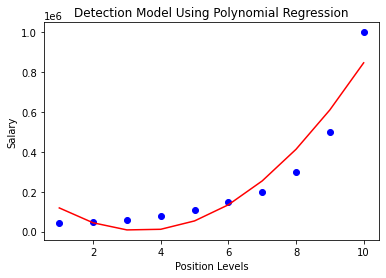

In [40]:
mtp.scatter(x,y,color="blue")
mtp.plot(x,lin_reg_2.predict(poly_regs.fit_transform(x)),color="red")
mtp.title('Detection Model Using Polynomial Regression')
mtp.xlabel('Position Levels')
mtp.ylabel('Salary')
mtp.show()

Predictions are somewhat closer to the real values at (degree=2)

**But what happens if we change the degree?**

##**Fitting the model with Degree = 3**

Theoritically, we should be getting a more accurate plot

In [41]:
poly_regs = PolynomialFeatures(degree=3)
x_poly = poly_regs.fit_transform(x) #This time, degree of x will be 3
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly,y)

# Linear Regression is implemented to dataset, but this time
# the degree is 3

LinearRegression()

###**Visualising the result of Polynomial Regression, at degree=3**

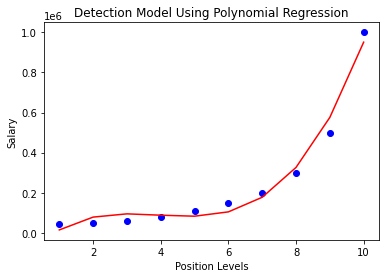

In [42]:
mtp.scatter(x,y,color="blue")
mtp.plot(x,lin_reg_2.predict(poly_regs.fit_transform(x)),color="red")
mtp.title('Detection Model Using Polynomial Regression')
mtp.xlabel('Position Levels')
mtp.ylabel('Salary')
mtp.show()

See that?! It's more accurate now! (Compared to degree=2)

So, if you predict the **salary of CEO**, it will give you an approximate values between

900K to 1000K

##**Fitting the model with Degree = 4**

In [43]:
poly_regs = PolynomialFeatures(degree=4)
x_poly = poly_regs.fit_transform(x) #This time, degree of x will be 4
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly,y)

# Linear Regression is implemented to dataset, but this time
# the degree is 4

LinearRegression()

###**Visualising the result of Polynomial Regression, at degree=4**

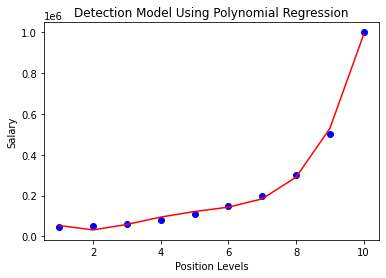

In [44]:
mtp.scatter(x,y,color="blue")
mtp.plot(x,lin_reg_2.predict(poly_regs.fit_transform(x)),color="red")
mtp.title('Detection Model Using Polynomial Regression')
mtp.xlabel('Position Levels')
mtp.ylabel('Salary')
mtp.show()

Whoa! The line is able to cover all the datapoints!

The **more degree you use**, the **better the accuracy**

If you predict the CEO's salary, it outputs much accurate result compared to degree=3


---



#**Predicting the Final Result**

We will predict the output for **level 6.5**, the candidate mentioned:

1. He has 4+ years experience
2. As a regional manager

That leaves us with somewhere between levels 7 and 6,

Is he telling the truth or is he bluffing?

##**Predicting the final output with Linear Regression Model**

In [45]:
lin_pred = lin_regs.predict([[6.5]])
print('The predicted salary would be',lin_pred)

The predicted salary would be [330378.78787879]


Linear Regression says that:

The salary for around **level 6.5** should be **330K**, comparing to the original dataset.

Since the candidate claims to have a **salary of 160K**, using this model we can consider the candidate is **bluffing**.

##**Predicting the final output with Polynomial Regression Model**

In [46]:
poly_pred = lin_reg_2.predict(poly_regs.fit_transform([[6.5]]))
print('The predicted salary would be',poly_pred)

The predicted salary would be [158862.45265155]


The value that we obtained **158K**  was closer to what he mentioned **160k**

We can conclude that using this model,

The candidate **is telling the truth**.

Our polynomial regression is giving us good accuracy compared to the linear regression model.